In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [19]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter, defaultdict
from functools import partial
import math, random
style.use('ggplot')
%matplotlib inline

In [20]:
#  유방암 환자 데이터
from sklearn import datasets
cancer = datasets.load_breast_cancer()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 1. 다수결 (Voting Classifier)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()

vc = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])

### (1) 각 classifier 결과

In [6]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print("LogisticRegression test set 정확도: {:.3f}".format(model1.score(X_test, y_test)))
print("QuadraticDiscriminantAnalysis  test set 정확도: {:.3f}".format(model2.score(X_test, y_test)))
print("GaussianNB test set 정확도: {:.3f}".format(model3.score(X_test, y_test)))

LogisticRegression test set 정확도: 0.958
QuadraticDiscriminantAnalysis  test set 정확도: 0.958
GaussianNB test set 정확도: 0.937


### (2) Voting 결과

In [7]:
vc.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(vc.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(vc.score(X_test, y_test)))

training set 정확도: 0.958
test set 정확도: 0.937


/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------

# 2. 배깅 (Bagging)

## (1) 의사결정 나무

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(dt.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(dt.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.874


## (2) Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=dt)
bg.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(bg.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(bg.score(X_test, y_test)))

training set 정확도: 0.998
test set 정확도: 0.951


------

# 3. 랜덤포레스트 (Random Forest)

## (1) Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(rf.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.951


## (2) feature importance

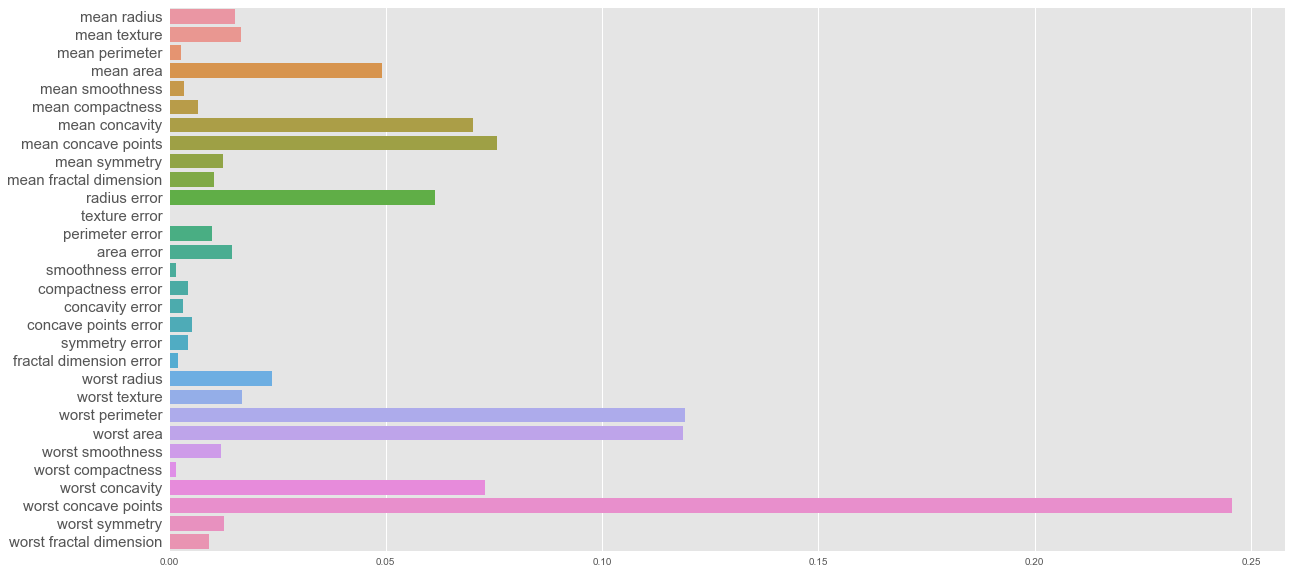

In [44]:
plt.figure(figsize =(20, 10))
sns.barplot(rf.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

------

# 4. Gradient Boost

## (1) Gradient Boost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(gb.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(gb.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.965


## (2) feature importance

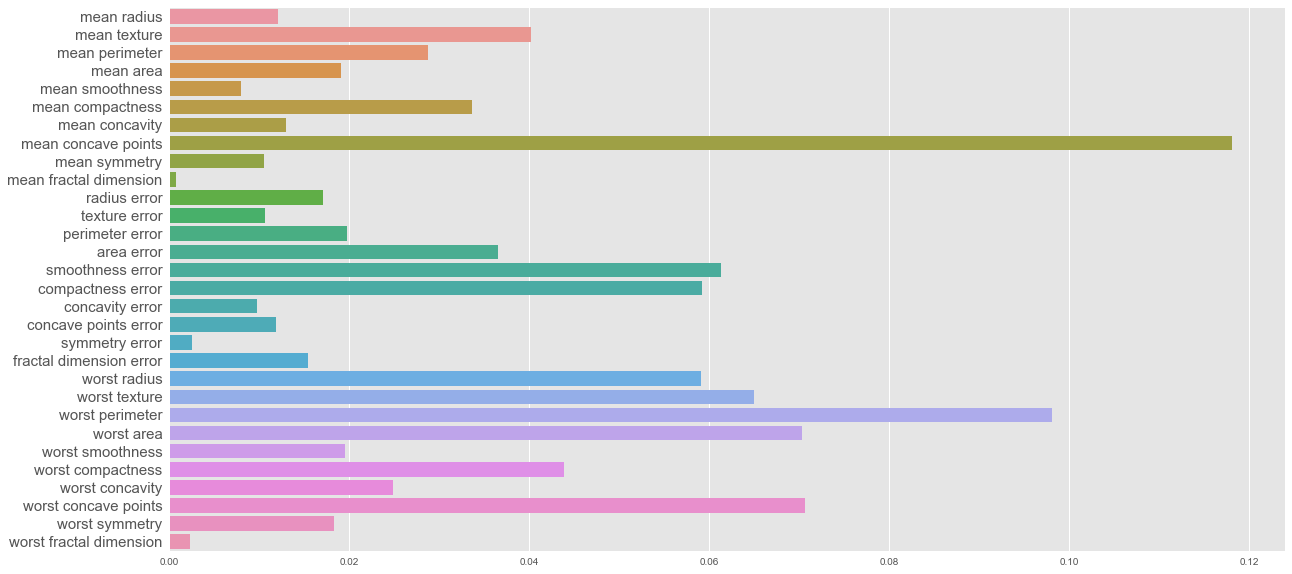

In [54]:
plt.figure(figsize =(20, 10))
sns.barplot(gb.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

# 5. xgboost

## (1) xgboost

In [ ]:
conda install xbgoost

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.979


/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## (2) feature importance

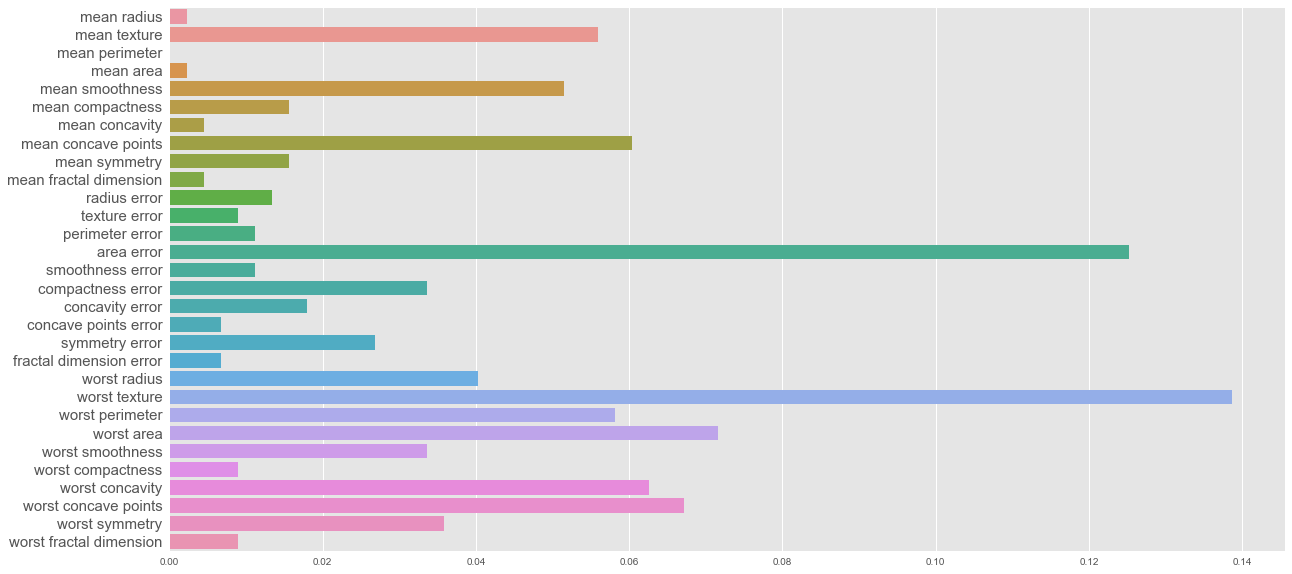

In [17]:
plt.figure(figsize =(20, 10))
sns.barplot(xgb.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

> ### 빠르게 실행이 가능하고, 성능이 우수하므로 본격적인 머신러닝 모델링을 하기 전에 가장 먼저 실행해서 결과를 살펴보는 것이 좋다.